# Symmetery in Deep Learning
#### Why there is a need to initialize weights randomly in a Deep Learning Models? What is Symmetry breaking in Deep Learning model? So this is what is explained here. I have used cleaned dataset for titanic problem. And ran a two layer deep learning model with this data to classify the class as survived or not. the observation is that when weights are initialized to zero or same values then a symmetery pattern is observed while this is not the case when weights are initialized randomly.

In [1]:
## Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## importing dataset
df = pd.read_csv('13-Logistic-Regression/titanic_clean.csv')

In [3]:
# Seperating data into features and target variables
X = df.drop('Survived', axis=1) 
Y =  np.array(df.Survived).reshape((-1,X.shape[0]))

In [5]:
## Transponsing X such that it can be used in making a deep learning model
X = X.T
X.shape, Y.shape

((9, 889), (1, 889))

In [6]:
## Number of training example
m = X.shape[1]

### Deep learning Model

In [72]:
## Number of Iterations
n = 10

In [73]:
## Sigmoid function
def sigmoid(z):
    a = np.exp(-z)
    return 1/(1+a)

In [74]:
## dict for storing costs
ini_zero = {}

## initializing weights of a 2 layer Deep Learning model as zero matrix.
W1 = np.zeros((4,X.shape[0]))
b1 = np.zeros((4,1))
W2 = np.zeros((Y.shape[0],4))
b2 = np.zeros((Y.shape[0],1))

irts = n
while irts > 0 :
    print('================ iteration number: ' + str(n-irts) + '================')
    irts = irts -1
    ## Forward Propagation
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)

    ## Cost estimation
    logerror = -(np.multiply(Y, np.log(A2)) +  np.multiply(1-Y, np.log(1 - A2)))
    cost = logerror.sum()
    ini_zero[n-irts] = cost
    print('The cost of the function is: ' + str(cost))
    print('W2:')
    print(W2)

    ## Backward Propagation
    dz2 = A2 - Y
    dw2 = np.dot(dz2, A1.T)/m
    db2 = np.sum(dz2, axis=1, keepdims = True)/m
    derivative = 1 - np.tanh(Z1) * np.tanh(Z1)
    dz1 = np.multiply(np.dot(W2.T, dz2) , derivative)
    dw1 = np.dot(dz1,X.T)/m
    db1 = np.sum(dz1, axis=1, keepdims = True)/m

    ## Updating Weights    
    W1 = W1 - 0.01*dw1
    b1 = b1 - 0.01*db1
    W2 = W2 - 0.01*dw2
    b2 = b2 - 0.01*db2


================ iteration number: 0================
The cost of the function is: 616.2078435177914
W2:
[[0. 0. 0. 0.]]
================ iteration number: 1================
The cost of the function is: 616.0851596067871
W2:
[[0. 0. 0. 0.]]
================ iteration number: 2================
The cost of the function is: 615.963088348405
W2:
[[0. 0. 0. 0.]]
================ iteration number: 3================
The cost of the function is: 615.841626682688
W2:
[[0. 0. 0. 0.]]
================ iteration number: 4================
The cost of the function is: 615.7207715645508
W2:
[[0. 0. 0. 0.]]
================ iteration number: 5================
The cost of the function is: 615.6005199637143
W2:
[[0. 0. 0. 0.]]
================ iteration number: 6================
The cost of the function is: 615.4808688646424
W2:
[[0. 0. 0. 0.]]
================ iteration number: 7================
The cost of the function is: 615.3618152664753
W2:
[[0. 0. 0. 0.]]
================ iteration number: 8======

In [75]:
## dict for storing costs
ini_nonzero = {}

## initializing weights of a 2 layer Deep Learning model as randmon value matrix.
W1 = np.random.randn(4,X.shape[0])*0.01
b1 = np.zeros((4,1))
W2 = np.random.randn(Y.shape[0],4) *0.01
b2 = np.zeros((Y.shape[0],1))

irts = n
while irts > 0 :
    irts = irts -1
    ## Forward Propagation
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)

    ## Cost estimation
    logerror = -(np.multiply(Y, np.log(A2)) +  np.multiply(1-Y, np.log(1 - A2)))
    cost = logerror.sum()
    ini_nonzero[n-irts] = cost
    print('The cost of the function is: ' + str(cost))
    print('W2:')
    print(W2)

    ## Backward Propagation
    dz2 = A2 - Y
    dw2 = np.dot(dz2, A1.T)/m
    db2 = np.sum(dz2, axis=1, keepdims = True)/m
    derivative = 1 - np.tanh(Z1) * np.tanh(Z1)
    dz1 = np.multiply(np.dot(W2.T, dz2) , derivative)
    dw1 = np.dot(dz1,X.T)/m
    db1 = np.sum(dz1, axis=1, keepdims = True)/m

    ## Updating Weights    
    W1 = W1 - 0.01*dw1
    b1 = b1 - 0.01*db1
    W2 = W2 - 0.01*dw2
    b2 = b2 - 0.01*db2

The cost of the function is: 618.467657107387
W2:
[[-0.02613353 -0.00093333  0.00258666  0.0013983 ]]
The cost of the function is: 617.9368604584199
W2:
[[-0.02496917 -0.00196022  0.00334577  0.00246877]]
The cost of the function is: 617.4085663208896
W2:
[[-0.02381911 -0.00298111  0.00417541  0.00353181]]
The cost of the function is: 616.883329601711
W2:
[[-0.02268362 -0.00399701  0.00504368  0.00458901]]
The cost of the function is: 616.3621018898264
W2:
[[-0.02156299 -0.0050084   0.00593568  0.0056414 ]]
The cost of the function is: 615.8457737634949
W2:
[[-0.02045749 -0.00601531  0.00684279  0.00668953]]
The cost of the function is: 615.3350445326356
W2:
[[-0.01936737 -0.0070175   0.00775952  0.00773351]]
The cost of the function is: 614.8304213514298
W2:
[[-0.01829283 -0.00801469  0.00868225  0.00877323]]
The cost of the function is: 614.3322569703781
W2:
[[-0.01723404 -0.00900664  0.00960854  0.0098084 ]]
The cost of the function is: 613.8407855606514
W2:
[[-0.01619114 -0.0099931

Text(0.5, 1.0, 'Cost VS Number of Iterations')

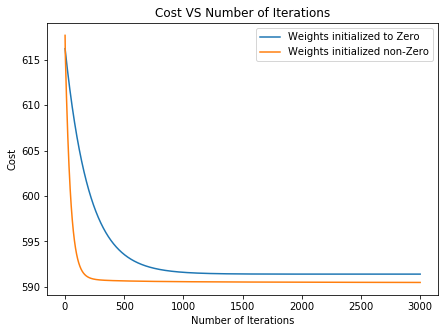

In [71]:
plt.figure(figsize=(7,5))
x1 = list(ini_zero.keys())
y1 = list(ini_zero.values())
x2 = list(ini_nonzero.keys())
y2 = list(ini_nonzero.values())
plt.plot(x1,y1, label = 'Weights initialized to Zero')
plt.plot(x2,y2,label = 'Weights initialized non-Zero')
plt.legend(loc = 1)
plt.ylabel('Cost')
plt.xlabel('Number of Iterations')
plt.title('Cost VS Number of Iterations for 3000 Iterations')